In [1]:
import requests
from bs4 import BeautifulSoup
import PyPDF2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import pylab as pl
import seaborn
import pickle
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [5]:
def count_do_pages(edi_id):
    page=1
    params = {'edi_id': edi_id, 'page': page}
    result = requests.get('http://doweb.rio.rj.gov.br/menu_pdf.php', params=params)
    soup = BeautifulSoup(result.text, "html.parser")
    for link in soup.find_all('td'):
            if 'Total' in link.text:
                return(link.text.split(':')[1])

In [3]:
paginas = {i: count_do_pages(i) for i in range(3401)}
pickle.dump(paginas, open('do_n_paginas.p', 'wb'))

In [5]:
def get_dates(numbers, data_busca):

    params = {'buscar_diario':'ok', 'data_busca': data_busca, 'tipo':'1'}
    result = requests.get('http://doweb.rio.rj.gov.br/', params=params)
    #print(result.text)
    soup = BeautifulSoup(result.text, "html.parser")
    for link in soup.find_all('img'):
        if 'edi_id' in link.attrs['src']:
            numbers[data_busca] = link.attrs['src'].split('=')[1]
        
        #numbers[link.attrs['value']] = link.contents[0].split('-')[0]

    return numbers

In [6]:
import datetime
base = datetime.datetime.today()
date_list = [(base - datetime.timedelta(days=x)).strftime("%d/%m/%Y") for x in range(0, 4000)]

In [8]:
numbers = {}
for i ,date in enumerate(date_list):
    numbers = get_dates(numbers, date)

In [10]:
pickle.dump(numbers, open('do_n_numbers.p', 'wb'))

In [17]:
paginas = pickle.load(open('do_n_paginas.p', 'rb'))

In [25]:
x = []
y = []
for key_pag, n_pag in paginas.items():
    for date_num, key_num in numbers.items():
        
         if int(key_num) == key_pag:
                x.append(datetime.datetime.strptime(date_num, '%d/%m/%Y'))
                y.append(int(n_pag))
       

In [27]:
pag = pd.Series(y, index=x)

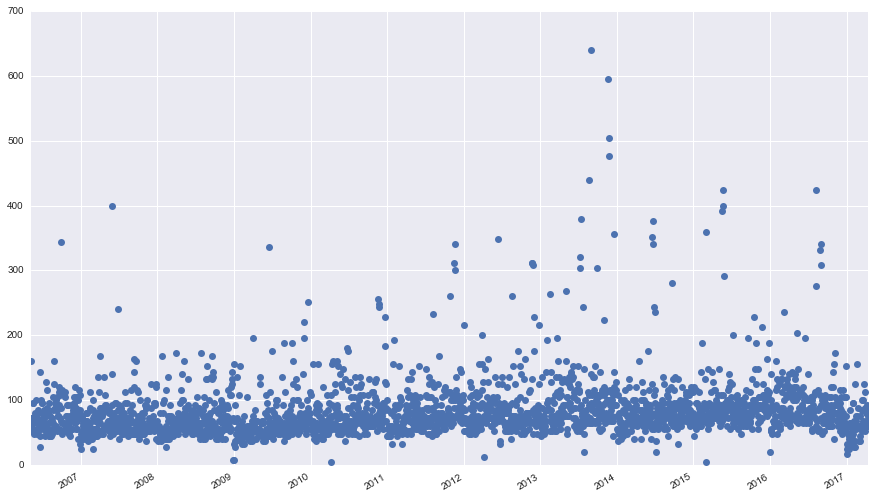

In [95]:
pag.plot(style='o')

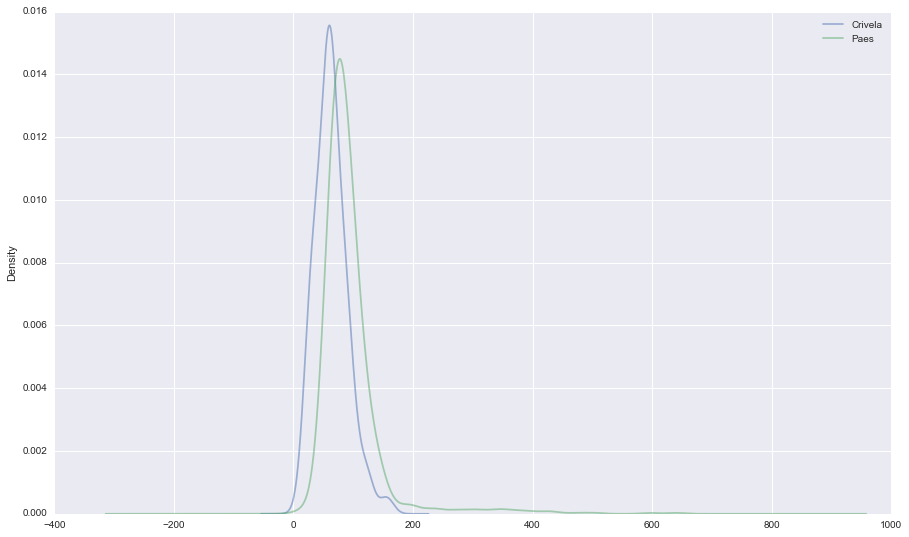

In [93]:
crivela = pag.truncate(before='1/1/2017')
paes = pag.truncate(before='1/1/2013', after='1/1/2017')

crivela.plot(kind='kde', legend=True, label='Crivela', yerr=crivela.std(),  alpha=0.5)
paes.plot(kind='kde', legend=True, label='Paes', alpha=0.5)

In [74]:
print('CRIVELA', pag.truncate(before='1/1/2017').describe())
print('PAES', pag.truncate(before='1/1/2013', after='4/1/2013').describe())
pag.truncate(before='1/1/2017').std()

CRIVELA count     68.000000
mean      63.235294
std       26.652052
min       16.000000
25%       44.000000
50%       60.000000
75%       77.000000
max      156.000000
dtype: float64
PAES count     59.000000
mean      85.220339
std       41.703414
min       44.000000
25%       60.000000
50%       72.000000
75%       96.000000
max      264.000000
dtype: float64


26.652051892142516

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

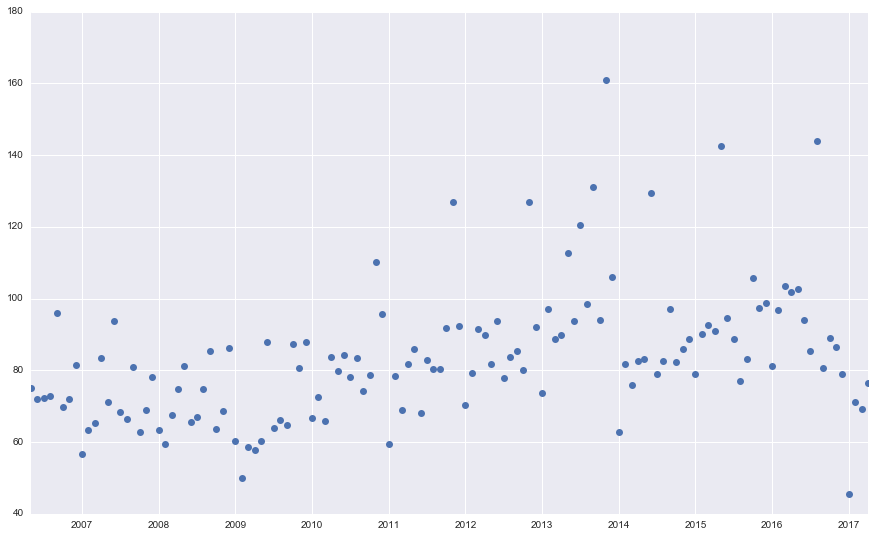

In [105]:
a = pag.groupby(pd.TimeGrouper("M"))
a = a.mean()
a.plot(style='o')